# <b>1 <span style='color:#00008B'>|</span>  EDA</b>

## <b>1.1 <span style='color:#2ae4f5'>|</span>  Imports de Bibliotecas</b>

In [1]:
%pip install pandas numpy matplotlib seaborn

     |████████████████████████████████| 7.8 MB 1.0 MB/s eta 0:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     |████████████████████████████████| 111 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 67.2 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
     |████████████████████████████████| 4.7 MB 21.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/humbertotavora/Documents/Pessoal/Processo Seletivo/Desafio Neuro - Modelo Anti Fraude/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <b>1.2 <span style='color:#2ae4f5'>|</span>  Carregamento do Dataset</b>

Configuracoes básicas de visualização

In [3]:
pd.set_option("display.max_columns", 50)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [5]:
df = pd.read_csv("../datasets/base_antifraude.gz", compression="gzip", sep='\t')

print("Formato do dataset:", df.shape)
df.head()

Formato do dataset: (47732, 205)


/var/folders/40/wt_fcnd546jc4_4rr2q97fs40000gn/T/ipykernel_23122/2741465154.py:1: DtypeWarning: Columns (203) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/base_antifraude.gz", compression="gzip", sep='\t')


,id,documento,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,...,VAR176,VAR177,VAR178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200
0,4db9c75f6a31c73414ad84fdd101b5d7,d92fa549809f55b4ea13caa1b108896f,202307,0.0,17820.60,0.166667,0.0,0.0,1.000000,NaN,0.0,0.910228,NaN,NaN,0.30,0.418605,NaN,NaN,0.0,0.080733,0.075134,NaN,0.030092,0.244624,NaN,...,0.0,NaN,NaN,NaN,0.333333,0.0,0.010,0.215811,0.001001,ALTA,0.111111,NaN,0.0,0.005289,NaN,0.609314,0.0,0.095790,NaN,0.066331,NaN,0.666667,0.135065,SUDESTE,0.0
1,9b07d4001632189d19de964894501e34,1af133c98723189f24bbfcb75abfcf92,202307,0.0,18513.56,0.166667,0.0,0.0,0.027211,NaN,0.0,NaN,NaN,NaN,0.04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,1.000000,ALTISSIMA,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NORTE,0.0
2,d55b6a81203f5a5ae6f362c483f36ff1,9e95be945b56ff10dc43df22381c9002,202307,0.0,22943.80,0.000000,0.0,0.0,0.013605,NaN,0.0,NaN,NaN,NaN,0.00,0.069767,NaN,0.228978,NaN,NaN,NaN,NaN,0.080593,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,0.012,NaN,0.005005,ALTA,0.055556,NaN,0.0,0.099451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,SUL,0.0
3,f6bb36049c3b42a62dfa88c46e0f79d2,50502098d83c37b5fa60241bc4bd6641,202307,0.0,19177.58,0.083333,0.0,0.0,0.020408,NaN,0.0,NaN,NaN,NaN,0.02,0.116279,NaN,NaN,NaN,NaN,NaN,NaN,0.044997,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.002,NaN,1.000000,ALTISSIMA,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,NaN,NORTE,0.0
4,2755ed6330b4980ea24faa1081183dc7,aad24a7552d24b46188103f4249f17e7,202307,0.0,16644.85,0.000000,0.0,0.0,0.000000,NaN,0.0,NaN,NaN,NaN,0.00,0.093023,NaN,NaN,0.0,NaN,NaN,NaN,0.359038,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.011,NaN,1.000000,MEDIA,NaN,NaN,0.0,0.055098,NaN,0.045513,NaN,0.532964,NaN,NaN,NaN,0.500000,NaN,NORDESTE,0.0


47732, 205 bate com a descrição do projeto.

## <b>1.3 <span style='color:#2ae4f5'>|</span>  Estatísticas Iniciais</b>

Infos básicas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47732 entries, 0 to 47731
Columns: 205 entries, id to VAR200
dtypes: float64(190), int64(1), object(14)
memory usage: 74.7+ MB


Estatísticas básicas com describe

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mes_ref,47732.0,202309.288653,1.646360,2.023070e+05,202308.000000,202309.000000,202311.000000,202312.000000
alvo,47732.0,0.041607,0.199692,0.000000e+00,0.000000,0.000000,0.000000,1.000000
vlr_financiado,47594.0,19183.781266,5535.485493,2.427880e+03,15742.620000,18836.810000,22276.500000,91283.650000
VAR1,26947.0,0.201139,0.253286,0.000000e+00,0.000000,0.083333,0.333333,1.000000
VAR2,26947.0,0.156529,0.293852,0.000000e+00,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
VAR195,2238.0,0.293470,0.222681,3.038740e-07,0.107887,0.240976,0.450916,1.000000
VAR196,7704.0,0.308971,0.201970,1.120454e-06,0.163283,0.277927,0.409290,1.000001
VAR197,35629.0,0.489437,0.180096,0.000000e+00,0.333333,0.500000,0.500000,1.000000
VAR198,3838.0,0.259947,0.189631,6.222729e-05,0.130120,0.211768,0.336232,1.000062


Atributos com mais de 80% de dados faltantes

In [25]:
df.isna().mean().sort_values(ascending=False).head(90)

VAR87     0.998827
VAR24     0.993170
VAR157    0.990174
VAR121    0.990070
VAR148    0.983114
            ...   
VAR196    0.838599
VAR54     0.836420
VAR179    0.834702
VAR16     0.828899
VAR43     0.817900
Length: 90, dtype: float64

## <b>1.4 <span style='color:#2ae4f5'>|</span>  Análise de Distribuições</b>

### Classe Alvo

Vamos analizar a distribuição de classes do alvo.

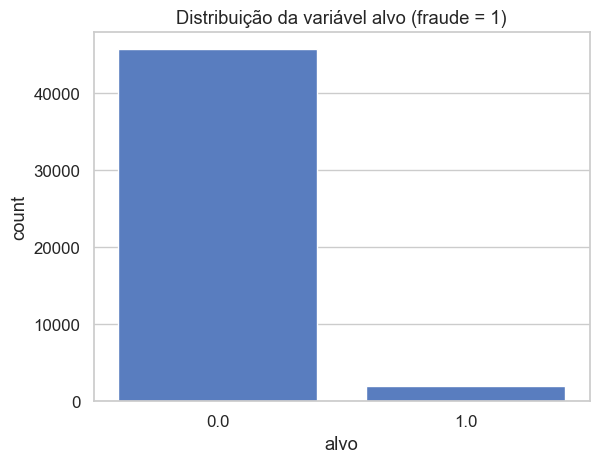

In [26]:
df['alvo'].value_counts(normalize=True) * 100

sns.countplot(x='alvo', data=df)
plt.title("Distribuição da variável alvo (fraude = 1)")
plt.show()

Podemos observar um forte desbalanceamento de classes, onde o numero de não pagantes da primeira parcela é muito menor do que o de pagantes. Claro, isso já era esperado. 

### Valor financiado

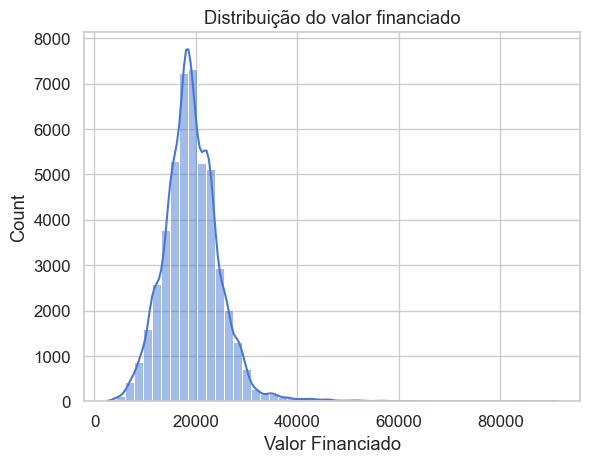

In [27]:
sns.histplot(df['vlr_financiado'], bins=50, kde=True)
plt.title("Distribuição do valor financiado")
plt.xlabel("Valor Financiado")
plt.show()

### Mês de referência

Podemos análisar também a taxa de possiveis fraudes por mês.

[202307 202308 202309 202310 202311 202312]


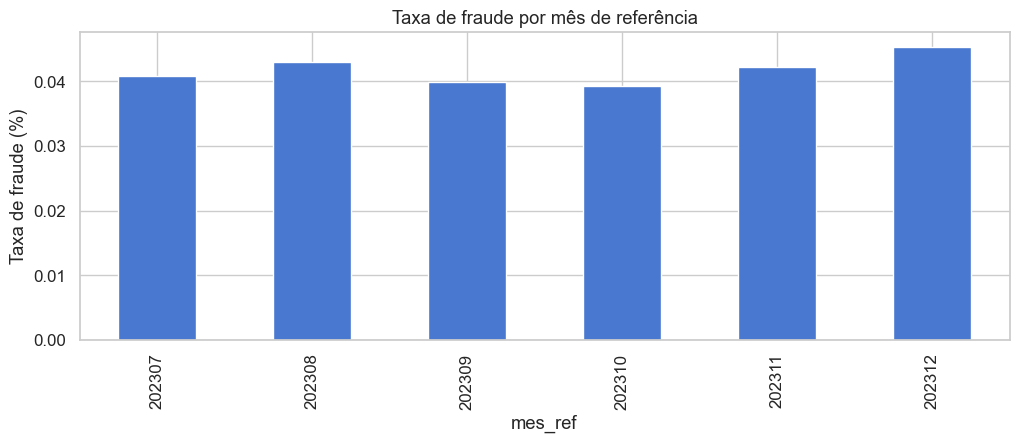

In [ ]:
fraude_mes = df.groupby("mes_ref")['alvo'].mean()

# Só confirmando que todos os meses estão sendo exibidos na analise de distribuição.
print(df['mes_ref'].unique())

fraude_mes.plot(kind='bar', figsize=(12,4))
plt.title("Taxa de fraude por mês de referência")
plt.ylabel("Taxa de fraude (%)")
plt.show()

Nenhum dos meses parece se destacar muito em relação aos outros. Mas é importante termos noção da volumetria em cada mes de referência para validarmos se essas diferencas são relevantes ou não. 

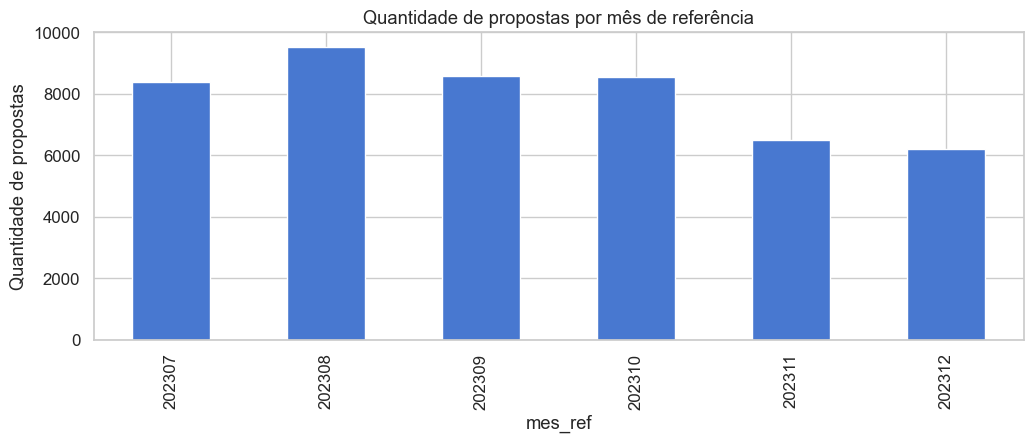

In [34]:
propostas_mesRef = df.groupby("mes_ref")['alvo'].count()

propostas_mesRef.plot(kind='bar', figsize=(12,4))
plt.title("Quantidade de propostas por mês de referência")
plt.ylabel("Quantidade de propostas")
plt.show()

Interessante observar que o mes de dezembro onde houveram mais casos de não pagamento da primeira parcela (percentualmente), foi o mês em que houveram menos propostas.

### Reincidência

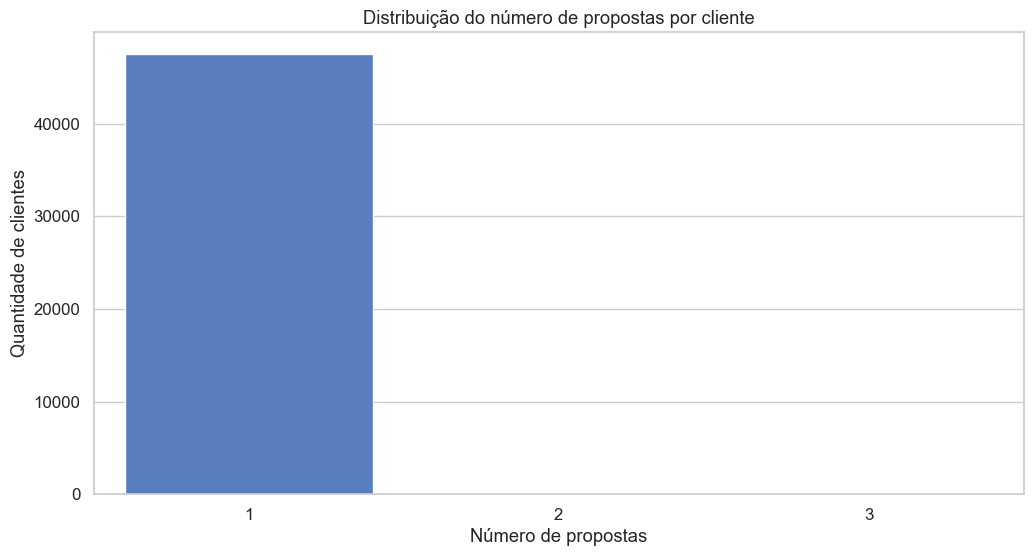

In [61]:
clientes_reincidentes = df['documento'].value_counts()


plt.figure(figsize=(12, 6))
sns.countplot(x=clientes_reincidentes.values)
plt.title("Distribuição do número de propostas por cliente")
plt.xlabel("Número de propostas")
plt.ylabel("Quantidade de clientes")
plt.show()

Como já era esperado, a quantidade de não reincidentes é muito maior quando comparada aos reincidentes, então vamos verificar manualmente.

In [62]:
clientes_com_multiplas_propostas = clientes_reincidentes[clientes_reincidentes > 1]

print(f'Temos {clientes_com_multiplas_propostas.count()} casos com > 1 proposta')

Temos 123 casos com > 1 proposta


Propostas feitos mais de duas vezes pelo mesmo cliente: 2


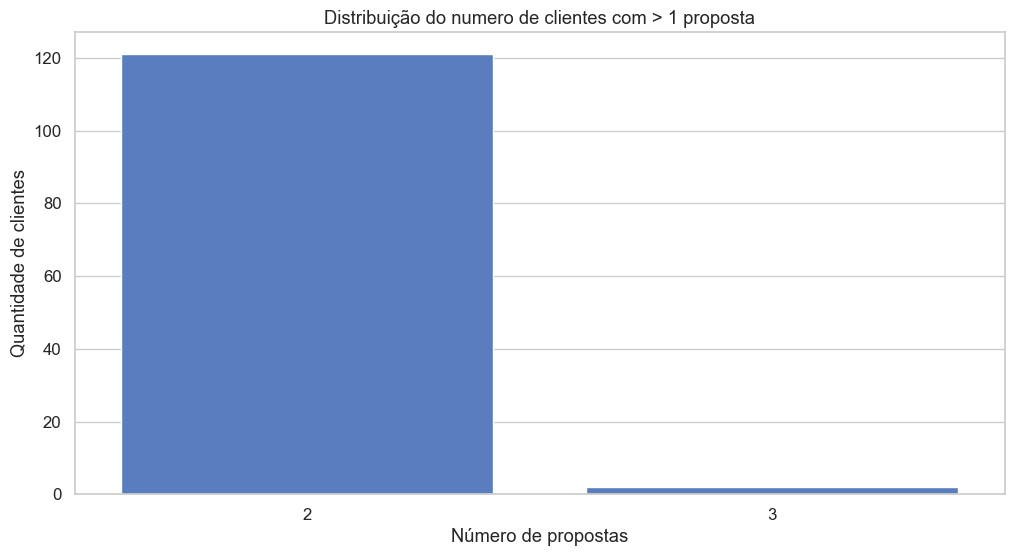

In [60]:
# Casos c 3 propostas, já que são bem menos do que os casos com 2.
print(f'Propostas feitos mais de duas vezes pelo mesmo cliente: {clientes_reincidentes[clientes_reincidentes > 2].count()}')


plt.figure(figsize=(12, 6))
sns.countplot(x=clientes_com_multiplas_propostas.values)
plt.title("Distribuição do numero de clientes com > 1 proposta")
plt.xlabel("Número de propostas")
plt.ylabel("Quantidade de clientes")
plt.show()

# <b>2 <span style='color:#00008B'>|</span>  Hipóteses mapeadas </b>